<a href="https://colab.research.google.com/github/nerd321/Cat-Recoginzer/blob/main/dhf1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install jmd_imagescraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from jmd_imagescraper.core import * # dont't worry, it's designed to work with import *
from pathlib import Path

root = Path().cwd()/"images"

duckduckgo_search(root, "Cats", "Angry Cats", max_results=1000)

Duckduckgo search: Angry Cats


[Path('/content/images/Cats/001_285738cf.jpg'),
 Path('/content/images/Cats/002_61bf83d5.jpg'),
 Path('/content/images/Cats/003_f02724b6.jpg'),
 Path('/content/images/Cats/004_2f6e47e8.jpg'),
 Path('/content/images/Cats/005_0dd22e73.jpg'),
 Path('/content/images/Cats/006_16a5a250.jpg'),
 Path('/content/images/Cats/007_e9941e82.jpg'),
 Path('/content/images/Cats/008_4703f4b6.jpg'),
 Path('/content/images/Cats/009_0858ef84.jpg'),
 Path('/content/images/Cats/010_ea88b60e.jpg'),
 Path('/content/images/Cats/011_9e3dc475.jpg'),
 Path('/content/images/Cats/012_4f592741.jpg'),
 Path('/content/images/Cats/013_6c87a2a7.jpg'),
 Path('/content/images/Cats/014_2172c2b8.jpg'),
 Path('/content/images/Cats/015_44bebf71.jpg'),
 Path('/content/images/Cats/016_a9f8a159.jpg'),
 Path('/content/images/Cats/017_cb0adb0b.jpg'),
 Path('/content/images/Cats/018_e8a55b58.jpg'),
 Path('/content/images/Cats/019_5d05f940.jpg'),
 Path('/content/images/Cats/020_e1b06ab8.jpg'),
 Path('/content/images/Cats/021_6c0214d8

In [ ]:
from jmd_imagescraper.core import * # dont't worry, it's designed to work with import *
from pathlib import Path

root = Path().cwd()/"images"

duckduckgo_search(root, "Dogs", "Bull Dogs", max_results=1000)

Duckduckgo search: Bull Dogs


[Path('/content/images/Dogs/001_a2a3f78a.jpg'),
 Path('/content/images/Dogs/002_118f8b90.jpg'),
 Path('/content/images/Dogs/003_c0c51161.jpg'),
 Path('/content/images/Dogs/004_11685826.jpg'),
 Path('/content/images/Dogs/005_5101d780.jpg'),
 Path('/content/images/Dogs/006_4ade4b0d.jpg'),
 Path('/content/images/Dogs/007_9023b84d.jpg'),
 Path('/content/images/Dogs/008_80ff7e3a.jpg'),
 Path('/content/images/Dogs/009_b3a4283a.jpg'),
 Path('/content/images/Dogs/010_0a28933f.jpg'),
 Path('/content/images/Dogs/011_c6d35952.jpg'),
 Path('/content/images/Dogs/012_896079d1.jpg'),
 Path('/content/images/Dogs/013_c1db6fbd.jpg'),
 Path('/content/images/Dogs/014_d92ffceb.jpg'),
 Path('/content/images/Dogs/015_3f6a50b3.jpg'),
 Path('/content/images/Dogs/016_df0bd53c.jpg'),
 Path('/content/images/Dogs/017_2767c4ba.jpg'),
 Path('/content/images/Dogs/018_8dec3797.jpg'),
 Path('/content/images/Dogs/019_54aa7993.jpg'),
 Path('/content/images/Dogs/020_5c117469.jpg'),
 Path('/content/images/Dogs/021_84660080

In [ ]:
path=Path("images")

In [ ]:
from fastai.vision.all import get_image_files

In [ ]:
get_image_files(path)

(#1847) [Path('images/Cats/120_b5c97142.jpg'),Path('images/Cats/360_97c3ba46.jpg'),Path('images/Cats/010_ea88b60e.jpg'),Path('images/Cats/086_52f81318.jpg'),Path('images/Cats/205_e675be3c.jpg'),Path('images/Cats/278_1881a173.jpg'),Path('images/Cats/651_5a0d29bd.jpg'),Path('images/Cats/036_9bdb22f9.jpg'),Path('images/Cats/477_2c45b2b5.jpg'),Path('images/Cats/484_dcff4778.jpg')...]

In [ ]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
from fastai import *

In [ ]:
!pip install fastai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install fastai --upgrade -q

     |████████████████████████████████| 213 kB 7.2 MB/s 
     |████████████████████████████████| 61 kB 9.0 MB/s 


In [ ]:
!pip install -U fastcore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install fastai --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
dls = bears.dataloaders(path)

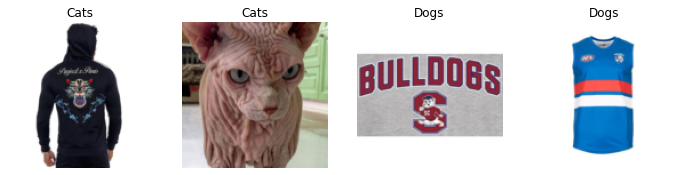

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

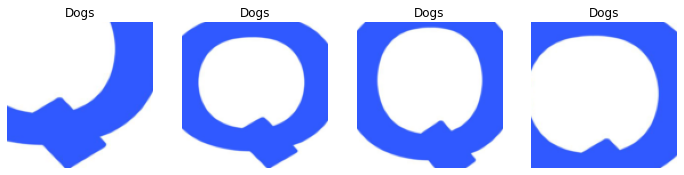

In [ ]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

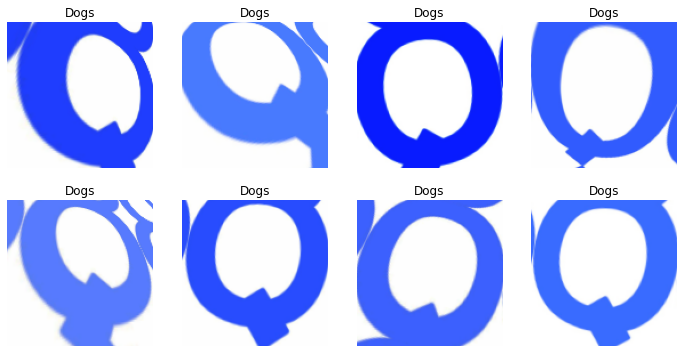

In [ ]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.635556,0.174146,0.065041,00:11


epoch,train_loss,valid_loss,error_rate,time
0,0.234963,0.112074,0.043360,00:11
1,0.160726,0.111535,0.029810,00:12
2,0.122639,0.096490,0.024390,00:11
3,0.094766,0.108165,0.027100,00:11


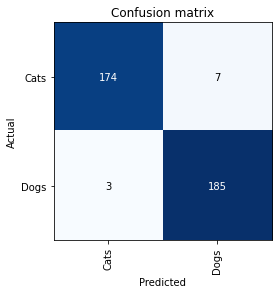

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

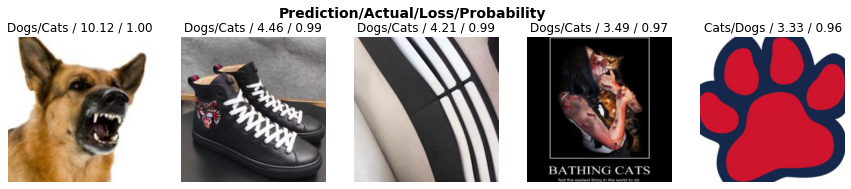

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
img=PILImage.create('/content/item1.jpeg')

In [ ]:
learn.predict(img)

('Cats', TensorBase(0), TensorBase([1.0000e+00, 1.6818e-11]))

In [ ]:
img=PILImage.create("/content/item2.jpeg")

In [ ]:
learn.predict(img)

('Dogs', TensorBase(1), TensorBase([0.0056, 0.9944]))